In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, LinearConstraint

In [66]:
def CR(x):
    K=len(x)
    num=0
    denum=0
    for i in range(K):
        num+=(K-(i+1)+1/2)*x[i]
        denum+=x[i]/4
        for j in range(i+1,K):
            denum+=x[i]*x[j]/(x[i]+x[j])
    return num/denum

def phi(x):
    return CR(np.append(x,1))

In [96]:
opt_list=[2]
k_range=[2,3,4,5,6,7,8,9,10,20,30,40,50,60,70,80,90,100,200]
for k_types in k_range:
    bounds=[(0,1)]*(k_types-1)
    A=np.diag(-np.ones(k_types-2),-1)+np.eye(k_types-1)
    lin_cons=LinearConstraint(A,np.zeros(k_types-1),np.inf*np.ones(k_types-1))
    x_0=np.flip(1/np.arange(2,k_types+1)**2)
    opt_res=minimize(phi,x_0,bounds=bounds,constraints=(lin_cons,))
    if not opt_res.success:
        print("Optimization Failure")
    opt_list.append(opt_res.fun)

approx_list=[]
for k_types in np.arange(1,1001):
    x_0=np.flip(1/np.arange(2,k_types+1)**2)
    approx_list.append(phi(x_0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


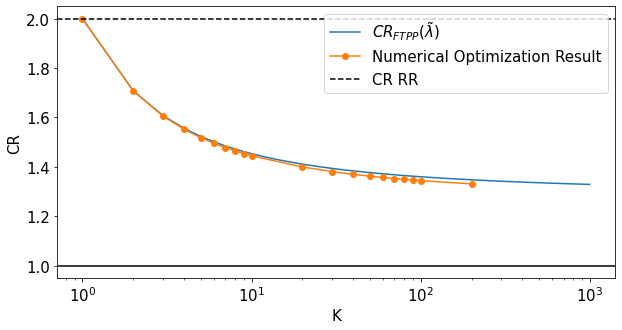

In [100]:
plt.rc('font', size=15)  
fig=plt.figure(figsize=(10,5))
ax=fig.add_subplot(111)
ax.plot(np.arange(1,1000+1),approx_list,label=r"$CR_{FTPP}(\tilde{\lambda})$")
ax.plot([1]+k_range,opt_list,marker="o",label="Numerical Optimization Result")
ax.set_xscale('log')
ax.axhline(2,label="CR RR",linestyle="--",color="black")
ax.axhline(1,color="black")
ax.set_xlabel("K")
ax.set_ylabel("CR")
ax.legend() 
plt.show()